# **Análise dos Dados de Partidas de Futebol**

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é analisar esses dados de forma exploratória, tratando valores ausentes de maneira cuidadosa para preservar suas características originais a fim de desenvolver um modelo preditivo.

## Obtenção dos dados

In [36]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [20]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,...,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,...,3.0,0.0,2.0,3.0,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,...,0.0,0.0,2.0,3.0,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,...,2.0,2.0,2.0,3.0,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,...,2.0,1.0,2.0,3.0,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,...,2.0,0.0,2.0,3.0,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


** Quntas linhas e colunas o conjunto de dados possui? Quais os tipos deas variáveis? **

In [18]:
# Tamanho do DataFrame
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}\n')

# Tipos de dados de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Número de linhas: 27716
Número de colunas: 40

Tipos de dados por coluna:

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Cruzamentos 1          float64
Cruzamentos 2          float64
Laterais 1             float64
Laterais 2             float64
Chutes bloqueados 1    float64
Chutes bloqueados 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Tiro de meta 1         float64
Tiro de meta 2         float64
Tratamentos 1          float64
Tratamentos 2          float64
Substituições 1        float64
Substituições 2        flo

## Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Fizemos uma cópia do DataFrame original para preservar os dados intactos durante a análise exploratória e o desenvolvimento do modelo preditivo. Isso nos permite realizar transformações e comparações com os dados originais, garantindo que qualquer alteração possa ser revertida, além de avaliar o impacto das mudanças nas performances do modelo.

In [27]:
df_copy = df.copy()

A simetria da distribuição será inicialmente avaliada com o objetivo de compreender o comportamento dos dados antes de qualquer etapa de limpeza ou transformação. Essa análise preliminar permite identificar possíveis distorções, como a presença de outliers ou distribuições assimétricas, além de fornecer uma base para comparação com os resultados obtidos após o pré-processamento.

A avaliação da simetria será feita por meio da métrica chamada skewness (ou coeficiente de assimetria), que indica o grau de inclinação da curva de distribuição. Quando o valor de skewness é próximo de zero, a distribuição é considerada simétrica. Valores positivos indicam uma cauda longa à direita (assimetria positiva) e valores negativos, uma cauda longa à esquerda (assimetria negativa). Em geral, considera-se que distribuições com skewness entre -0.5 e 0.5 são aproximadamente simétricas.

In [77]:
# Selecionando apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)


                     Assimetria (skewness) Distribuição
Contra-ataques 2                  1.199952  Assimétrica
Contra-ataques 1                  1.140710  Assimétrica
Tratamentos 1                     0.906712  Assimétrica
Gols 2                            0.900305  Assimétrica
Tratamentos 2                     0.793799  Assimétrica
Chutes bloqueados 2               0.750850  Assimétrica
Impedimentos 2                    0.706433  Assimétrica
Impedimentos 1                    0.642870  Assimétrica
Defesas difíceis 1                0.610775  Assimétrica
Chutes fora 2                     0.571903  Assimétrica
Chutes bloqueados 1               0.534362  Assimétrica
Cartões amarelos 1                0.528308  Assimétrica
Chutes fora 1                     0.465957    Simétrica
Cruzamentos 2                     0.437891    Simétrica
Escanteios 1                      0.418099    Simétrica
Cartões amarelos 2                0.415287    Simétrica
Chutes a gol 2                    0.409413    Si

A análise da assimetria (skewness) mostrou que várias variáveis numéricas do conjunto de dados apresentam distribuições assimétricas. Esse comportamento pode comprometer a consistência da análise estatística e a performance de modelos que assumem distribuições mais equilibradas. Por isso, nas próximas etapas, será realizado o tratamento de valores duplicados e outliers com o objetivo de reduzir essas distorções e aproximar as distribuições de uma forma mais simétrica e adequada à análise.

### Tratando linhas duplicadas

Verificando se há registros duplicados no Dataframe, pois não nos interessar analisar a mesma partida mais de uma vez. 

In [28]:

# Verificando se há linhas duplicadas no dataframe
if df.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Sim, existem 8 linhas duplicadas.


Identificamos a presença de registros duplicados no dataframe. Na ausência de uma coluna com a data das partidas, adotamos o critério de considerar duplicatas exatas como representações da mesma partida. 

Assim, como cada linha representa uma partida de futebol, essas duplicatas indicam possíveis inconsistências, como erros de entrada ou falhas na coleta de dados.

A remoção dessas entradas garante que cada partida seja considerada apenas uma vez, preservando a integridade do conjunto de dados e evitando distorções nas análises estatísticas.

In [45]:
# Retorna um novo Dataframe com apenas as linhas não duplicadas 
df_copy = df_copy.loc[~df_copy.duplicated()].drop_duplicates().reset_index(drop=True)

# Verificando novamente se há linhas duplicadas no dataframe
if df_copy.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')

Não, não existem linhas duplicadas.


In [84]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Contra-ataques 2                  1.207144  Assimétrica
Contra-ataques 1                  1.146711  Assimétrica
Tratamentos 1                     0.919721  Assimétrica
Gols 2                            0.894905  Assimétrica
Tratamentos 2                     0.805496  Assimétrica
Chutes bloqueados 2               0.753231  Assimétrica
Impedimentos 2                    0.704523  Assimétrica
Impedimentos 1                    0.647019  Assimétrica
Defesas difíceis 1                0.612311  Assimétrica
Chutes bloqueados 1               0.534153  Assimétrica
Cartões amarelos 1                0.520934  Assimétrica
Chutes fora 1                     0.473256    Simétrica
Chutes a gol 2                    0.415545    Simétrica
Escanteios 1                      0.414986    Simétrica
Cartões amarelos 2                0.413157    Simétrica
Cruzamentos 2                     0.372566    Simétrica
Escanteios 2                      0.356309    Si

### Mudando o tipo de variável das colunas

Vamos codificar as colunas Position 1, Position 2, Time 1 e Time 2.

In [76]:
# Colunas não numéricas: Time e Position

times = np.union1d(df['Time 1'].dropna().unique(), df_copy['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df['Position 1'].dropna().unique(), df['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

def insere_coluna_codificada(df, coluna, nome_coluna_codigo, dicionario_codificacao):
    if(nome_coluna_codigo not in df_copy.columns):
        df_copy.insert(df_copy.columns.get_loc( coluna )+1, nome_coluna_codigo, df_copy[ coluna ].map( dicionario_codificacao ))

# Cria o dataframe com as colunas não numéricas codificadas em novas
df_codificado = df_copy.copy()

insere_coluna_codificada(df_codificado, 'Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada(df_codificado, 'Time 2', 'Time2_codigo', times_codigo)

df_codificado.head()

Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25.0,3-5-1-1,11.0
1,4.0,3.0,2.0,1.0,6.0,2.0,6.0,7.0,21.0,12.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,37.0,63.0,Livingston,171,Aberdeen,4,4-3-3,23.0,4-1-4-1,17.0
2,6.0,0.0,2.0,2.0,11.0,4.0,7.0,7.0,7.0,11.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,59.0,41.0,Hibernian,134,Ross County,236,4-2-3-1,20.0,5-4-1,30.0
3,8.0,7.0,0.0,1.0,4.0,6.0,2.0,5.0,13.0,16.0,5.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,45.0,55.0,Dundee FC,86,Hibernian,134,4-3-3,23.0,4-2-3-1,20.0
4,7.0,3.0,4.0,1.0,4.0,4.0,1.0,4.0,15.0,11.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,39.0,61.0,Dundee U.,87,Hearts,129,4-4-2,25.0,NaN,NaN


### Tratando Outliers

Descrever a importancia de tracar outliers aqui, como foi feito e justificar a escolha do método. 

In [121]:
# Definindo o threshold para o IQR
threshold = 1.5

# Selecionando apenas colunas numéricas
numeric_cols = df_copy.select_dtypes(include='number').columns

# Criando um dicionário para armazenar os resultados
outliers_por_coluna = {}

for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.30)
    Q3 = df_copy[col].quantile(0.70)
    IQR = Q3 - Q1
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    outliers_por_coluna[col] = len(outliers)

# Criando uma tabela
tabela_outliers = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['Quantidade de Outliers'])
tabela_outliers = tabela_outliers.sort_values(by='Quantidade de Outliers', ascending=False)

print(tabela_outliers)


                     Quantidade de Outliers
Cruzamentos 2                             5
Chutes a gol 1                            0
Impedimentos 1                            0
Chutes a gol 2                            0
Escanteios 1                              0
Escanteios 2                              0
Chutes fora 1                             0
Impedimentos 2                            0
Chutes fora 2                             0
Faltas 1                                  0
Cartões amarelos 1                        0
Faltas 2                                  0
Cartões amarelos 2                        0
Cartões vermelhos 1                       0
Cartões vermelhos 2                       0
Cruzamentos 1                             0
Laterais 1                                0
Laterais 2                                0
Chutes bloqueados 1                       0
Chutes bloqueados 2                       0
Contra-ataques 1                          0
Contra-ataques 2                

In [122]:
# Remover os outliers das colunas numéricas
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.30)
    Q3 = df_copy[col].quantile(0.70)
    IQR = Q3 - Q1
    
    # Identificando os outliers
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    
    # Excluindo os outliers
    df_copy = df_copy.drop(outliers.index)


In [124]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Tratamentos 1                     1.029127  Assimétrica
Gols 2                            0.886834  Assimétrica
Chutes bloqueados 1               0.703610  Assimétrica
Tratamentos 2                     0.602737  Assimétrica
Impedimentos 2                    0.602428  Assimétrica
Contra-ataques 1                  0.460285    Simétrica
Contra-ataques 2                  0.424118    Simétrica
Cartões amarelos 2                0.401795    Simétrica
Cartões amarelos 1                0.394750    Simétrica
Defesas difíceis 2                0.379097    Simétrica
Gols 1                            0.312185    Simétrica
Chutes fora 2                     0.257608    Simétrica
Chutes a gol 2                    0.236316    Simétrica
Chutes fora 1                     0.221791    Simétrica
Tiros-livres 1                    0.205321    Simétrica
Cruzamentos 2                     0.197257    Simétrica
Defesas difíceis 1                0.195317    Si

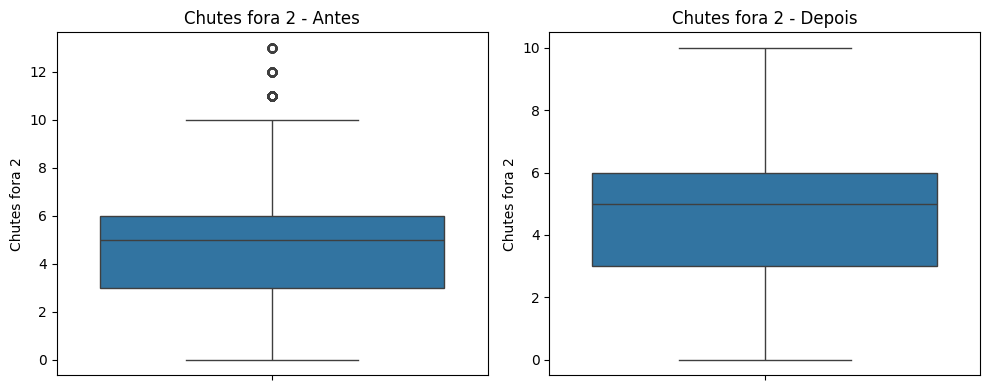

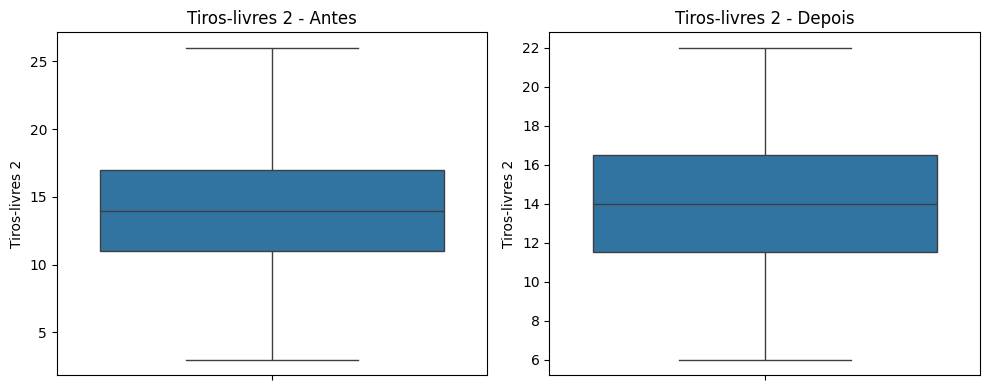

In [119]:
# Lista de colunas que você quer comparar (escolha algumas)
colunas_para_visualizar = ['Chutes fora 2', 'Tiros-livres 2']

# Cria os subplots
for col in colunas_para_visualizar:
    plt.figure(figsize=(10, 4))

    # Antes
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Antes')

    # Depois
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_copy[col])
    plt.title(f'{col} - Depois')

    plt.tight_layout()
    plt.show()



### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [125]:
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df_copy.dtypes)

Tratamentos 2          88.315372
Tratamentos 1          88.315372
Contra-ataques 2       83.702023
Contra-ataques 1       83.702023
Substituições 2        78.767253
Substituições 1        78.767253
Chutes bloqueados 2    74.368186
Chutes bloqueados 1    74.368186
Cruzamentos 1          73.996345
Cruzamentos 2          73.996345
Defesas difíceis 1     72.698053
Defesas difíceis 2     72.698053
Tiros-livres 2         72.527888
Tiros-livres 1         72.527888
Tiro de meta 1         58.744564
Tiro de meta 2         58.744564
Laterais 1             46.864562
Laterais 2             46.864562
Impedimentos 1         13.915674
Impedimentos 2         13.915674
Posse 1(%)             12.358984
Posse 2(%)             12.358984
Faltas 1               12.258146
Faltas 2               12.258146
Escanteios 1           12.220332
Escanteios 2           12.220332
Chutes fora 2          12.214029
Chutes fora 1          12.214029
Chutes a gol 2          8.098569
Chutes a gol 1          8.098569
Position 1

Considerando que as variáveis Gols 1 e 2 são as mais importantes para definir o resultado de um jogo, vamos estudar a correlação entre Gols 1 e 2 e as variáveis com mais de 10% de NaN para a partir disso quais iremos excluir. A coorelação pode ser vista tanto na atbela quanto no gráfico abaixo.

Correlação com Gols 1:


Contra-ataques 1       0.144084
Posse 1(%)             0.065736
Tratamentos 1          0.058001
Defesas difíceis 2     0.056110
Cruzamentos 2          0.050189
Impedimentos 1         0.023539
Escanteios 2           0.007003
Chutes fora 2         -0.003186
Escanteios 1          -0.010290
Tiro de meta 1        -0.014740
Chutes fora 1         -0.017261
Chutes bloqueados 1   -0.017629
Impedimentos 2        -0.019171
Tiros-livres 1        -0.021633
Faltas 2              -0.022514
Chutes bloqueados 2   -0.023592
Faltas 1              -0.030271
Laterais 2            -0.032574
Tiros-livres 2        -0.039550
Defesas difíceis 1    -0.055523
Tratamentos 2         -0.058455
Posse 2(%)            -0.065733
Tiro de meta 2        -0.087714
Cruzamentos 1         -0.096999
Laterais 1            -0.105743
Contra-ataques 2      -0.178229
Substituições 1             NaN
Substituições 2             NaN
Name: Gols 1, dtype: float64


Correlação com Gols 2:


Contra-ataques 2       0.228670
Posse 2(%)             0.092089
Cruzamentos 1          0.058133
Tratamentos 2          0.055457
Defesas difíceis 1     0.042425
Impedimentos 2         0.029272
Chutes bloqueados 2    0.024979
Chutes bloqueados 1    0.010663
Escanteios 2           0.007514
Escanteios 1          -0.012500
Chutes fora 2         -0.013517
Laterais 1            -0.022070
Faltas 1              -0.028603
Tiro de meta 2        -0.034745
Impedimentos 1        -0.038922
Chutes fora 1         -0.040387
Tiros-livres 2        -0.043371
Tiros-livres 1        -0.044116
Faltas 2              -0.062593
Defesas difíceis 2    -0.062635
Tratamentos 1         -0.063908
Tiro de meta 1        -0.066493
Laterais 2            -0.071473
Cruzamentos 2         -0.087675
Posse 1(%)            -0.092117
Contra-ataques 1      -0.167279
Substituições 1             NaN
Substituições 2             NaN
Name: Gols 2, dtype: float64

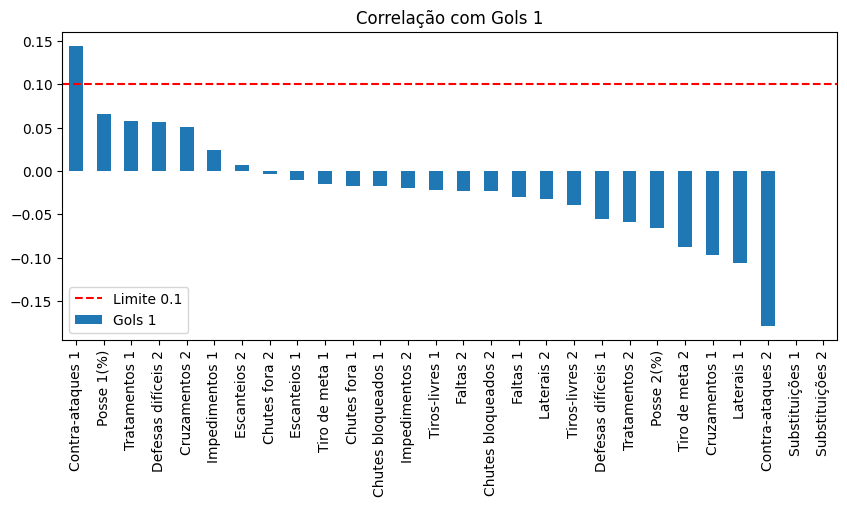

In [126]:
# Selecionar só as colunas com muitos NaNs
na_maiores_10 = df.columns[df.isnull().mean() > 0.1]

# Juntar com Gols 1 e Gols 2 para estudar correlação
colunas_para_estudo = list(na_maiores_10) + ['Gols 1', 'Gols 2']

# Criar uma cópia só com essas
estudo = df[colunas_para_estudo]

# Calcular correlação entre essas variáveis
correlacoes = estudo.corr(numeric_only=True)

# Visualizar a correlação com Gols 1 e Gols 2
cor_gols1 = correlacoes['Gols 1'].drop(['Gols 1', 'Gols 2'])
cor_gols2 = correlacoes['Gols 2'].drop(['Gols 1', 'Gols 2'])

# Mostrar ordenado
print("Correlação com Gols 1:")
display(cor_gols1.sort_values(ascending=False))

print("\nCorrelação com Gols 2:")
display(cor_gols2.sort_values(ascending=False))

cor_gols1.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 1', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()


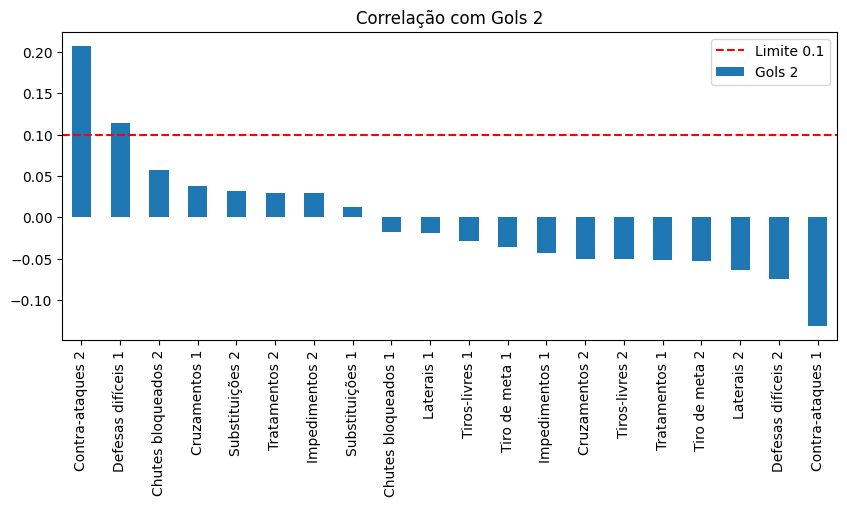

In [ ]:
cor_gols2.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 2', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()

Baseado nas correlações apresentadas, algumas variáveis demonstram baixa relação com os gols marcados por cada time (Gols 1 e Gols 2), o que indica que elas podem ter pouca relevância na previsão de resultados. 

**O que os números significam?**  
Correlação próxima de 1 indica uma forte relação positiva (ex: quanto mais daquela variável, mais gols são marcados). Correlação próxima de -1 indica uma forte relação negativa (ex: quanto mais daquela variável, menos gols). Já valores próximos de 0 sugerem que não há relação clara.  
Na prática, em bases de dados reais (ou seja, com variações naturais, erros de entrada, valores ausentes — o chamado *ruído*), correlações acima de ±0.1 já podem indicar alguma influência, sendo este um valor de corte comumente utilizado em análises exploratórias para triagem de variáveis.

Com base nesse critério, e levando em conta que muitas dessas variáveis também possuem mais de 10% de valores ausentes (o que agrava a irrelevância), as seguintes variáveis foram selecionadas para descarte:

Laterais 1
Laterais 2
Tiros-livres 1
Tiros-livres 2
Tiro de meta 1
Tiro de meta 2
Substituições 1
Substituições 2
Cruzamentos 1
Cruzamentos 2
Tratamentos 1
Tratamentos 2
Chutes bloqueados 1
Chutes bloqueados 2
Impedimentos 1
Impedimentos 2

Essas variáveis possuem correlação inferior a ±0.1 com os gols dos respectivos times e podem ser eliminadas para reduzir a dimensionalidade do modelo. No entanto, vale destacar que uma variável pode ser mantida caso tenha justificativa contextual, por exemplo, se o conhecimento do domínio esportivo indicar uma possível influência indireta nos resultados.


In [ ]:
colunas_para_dropar = [
    'Laterais 1', 'Laterais 2',
    'Tiros-livres 1', 'Tiros-livres 2',
    'Tiro de meta 1', 'Tiro de meta 2',
    'Substituições 1', 'Substituições 2',
    'Cruzamentos 1', 'Cruzamentos 2',
    'Tratamentos 1', 'Tratamentos 2',
    'Chutes bloqueados 1', 'Chutes bloqueados 2',
    'Impedimentos 1', 'Impedimentos 2'
]

# Confirma quais colunas realmente existem no DataFrame
colunas_existentes = [col for col in colunas_para_dropar if col in df.columns]

# Agora sim remove só as que existem
df = df.drop(columns=colunas_existentes)

df.head()


,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,...,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,...,3.0,0.0,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,...,0.0,0.0,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,...,2.0,2.0,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,...,2.0,1.0,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,...,2.0,0.0,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [ ]:
df.shape

(27716, 24)

Na etapa de tratamento de dados faltantes, optamos pela imputação utilizando a mediana como estratégia principal. Embora existam diferentes métodos, como a substituição pela média, a mediana se destaca por sua robustez. Independentemente de a distribuição dos dados em uma variável ser simétrica ou assimétrica, a mediana tende a ser menos influenciada por valores extremos (outliers) e por possíveis desvios na distribuição. 

A imputação pela moda (categoria mais frequente) foi escolhida para substituir os valores faltantes nas colunas categóricas, como Time 1, Time 2, Position 1 e Position 2, pois assume que a categoria mais recorrente tem uma maior probabilidade de representar os dados ausentes e é onde a imputação de valores numéricos não seria adequada.

In [ ]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df[col].median()           # Calcula a mediana da coluna 
        df[col] = df[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df:
    if(tabelaPorcentagem[coluna] < porcentagem and df.dtypes[coluna] == 'float64'):

      col_median=df[coluna].median()

      df[coluna]=df[coluna].fillna(col_median)

  return df 

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df['Position 1'].mode()[0],df['Position 2'].mode()[0]
    df['Position 1']=df['Position 1'].fillna(modaP1)
    df['Position 2']=df['Position 2'].fillna(modaP2)
    return df

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df.isnull().sum())


Chutes a gol 1         0
Chutes a gol 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Contra-ataques 1       0
Contra-ataques 2       0
Gols 1                 0
Gols 2                 0
Defesas difíceis 1     0
Defesas difíceis 2     0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
dtype: int64
